## Contextualização do Dataset

Este notebook utiliza o **dataset `caso_full`**, que contém dados diários sobre a pandemia de COVID-19 no Brasil, registrados por município. Os dados foram coletados e tratados manualmente por Álvaro Justen e uma equipe de voluntários do projeto Brasil.IO, com o objetivo de fornecer informações detalhadas e atualizadas para ajudar na tomada de decisões locais. A coleta e tratamento desses dados ocorrem em um cenário em que a pandemia exigiu respostas rápidas e eficazes a nível municipal e estadual, mas a disponibilidade de dados oficiais estruturados pelo governo brasileiro era limitada.

A coleta manual dos dados se deu em um contexto de desafios relacionados à transparência e ao acesso à informação pública no Brasil, especialmente durante a crise de saúde pública da pandemia de COVID-19. As informações sobre casos e mortes de COVID-19 fornecidas pelo Ministério da Saúde eram frequentemente incompletas, lentas ou de difícil acesso, dificultando a resposta rápida por parte de estados e municípios.

Para superar essas limitações, os dados foram extraídos diretamente dos boletins epidemiológicos divulgados pelas Secretarias Estaduais de Saúde, permitindo uma visão detalhada e atualizada da evolução da pandemia em cada município brasileiro. Esse esforço colaborativo envolveu 35 pessoas voluntárias e resultou na criação de um dataset estruturado, acessível via API e em arquivos CSV, oferecendo uma base sólida para análises.

### Colunas do Dataset

| Coluna                                   | Descrição                                                                                                                                                          |
|------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **city**                                 | Nome do município. Pode estar em branco se o registro se refere ao estado ou se for categorizado como "Importados/Indefinidos".                                      |
| **city_ibge_code**                       | Código IBGE do município ou estado correspondente.                                                                                                                 |
| **date**                                 | Data de coleta dos dados no formato YYYY-MM-DD.                                                                                                                    |
| **epidemiological_week**                 | Número da semana epidemiológica, no formato YYYYWW.                                                                                                                |
| **estimated_population**                 | População estimada para o município/estado em 2020, segundo o IBGE.                                                                                                |
| **estimated_population_2019**            | População estimada para o município/estado em 2019, segundo o IBGE. ATENÇÃO: esta coluna é desatualizada. Prefira usar a coluna `estimated_population`.             |
| **is_last**                              | Indica se o registro é o mais recente para aquele local (`True` ou `False`).                                                                                       |
| **is_repeated**                          | Indica se os dados daquele dia foram publicados ou se são repetidos de um boletim anterior.                                                                         |
| **last_available_confirmed**             | Número de casos confirmados até a data especificada.                                                                                                               |
| **last_available_confirmed_per_100k_inhabitants** | Número de casos confirmados por 100.000 habitantes (com base na população estimada).                                                                                |
| **last_available_date**                  | Última data para a qual há dados disponíveis.                                                                                                                      |
| **last_available_death_rate**            | Taxa de mortalidade (número de mortes dividido pelo número de casos confirmados).                                                                                   |
| **last_available_deaths**                | Número total de mortes até a data especificada.                                                                                                                    |
| **order_for_place**                      | Ordem do registro para um local específico, começando em 1 para o primeiro boletim.                                                                                 |
| **place_type**                           | Tipo de local (municipal ou estadual), com valores "city" (município) ou "state" (estado).                                                                          |
| **state**                                | Sigla do estado (exemplo: SP para São Paulo).                                                                                                                      |
| **new_confirmed**                        | Número de novos casos confirmados desde o último dia registrado.                                                                                                   |
| **new_deaths**                           | Número de novos óbitos desde o último dia registrado.                                                                                                              |

### Metodologia de Coleta

A coleta dos dados foi realizada manualmente a partir de boletins epidemiológicos publicados pelas Secretarias de Saúde dos estados brasileiros. Quando um boletim não era divulgado, o dado mais recente disponível era replicado, e a coluna `is_repeated` indicava esse cenário. Este processo de catalogação foi contínuo e exigiu monitoramento constante para garantir a precisão e atualização dos dados, sendo alimentado por uma equipe de voluntários. Os dados abrangem casos confirmados, mortes, população estimada e outras métricas relevantes para entender a propagação e os impactos da COVID-19.

### Informações Adicionais Relevantes

#### Diferenças entre Contagens Estaduais e Municipais
As contagens de casos podem divergir entre dados estaduais e municipais por dois principais motivos:
1. **Divulgação centralizada por estado**: Algumas Secretarias Estaduais de Saúde (SES) optaram por parar de divulgar dados por município em alguns dias, como ocorreu em São Paulo.
2. **Erros de divulgação**: Em certos casos, as SES divulgam informações incorretas, o que pode ocasionar divergências.

#### Comparação com Dados do Ministério da Saúde
Os dados disponíveis no Brasil.IO podem diferir dos divulgados pelo Ministério da Saúde por diferentes razões, como:
- O tempo de coleta dos dados. A equipe do Brasil.IO pode coletar dados mais atualizados diretamente das Secretarias Estaduais após a divulgação do Ministério da Saúde.
- Diferença de publicação. As Secretarias Estaduais podem informar dados ao Ministério da Saúde antes de disponibilizá-los ao público, o que pode causar descompassos temporários entre as fontes.

#### Divergências entre Totais Municipais e Estaduais
Se os casos somados por município de um estado não coincidem com o total divulgado para o estado, isso não necessariamente indica erro. Em muitos casos, as Secretarias Estaduais não divulgam todos os municípios afetados diariamente. O Brasil.IO verifica esses dados manualmente, reduzindo a chance de erro, mas ainda podem ocorrer discrepâncias.

#### Limitações na Cobertura de Municípios
Nem todos os municípios possuem registros completos em todas as datas. O histórico de dados só começa a partir do primeiro caso confirmado ou divulgado pela Secretaria Estadual. Além disso, algumas Secretarias não emitem boletins diários, o que pode resultar em datas sem registros.

### Possíveis Análises

Com base no dataset `caso_full`, várias análises podem ser realizadas para entender a evolução da pandemia no Brasil:
1. **Evolução temporal da COVID-19 por município**: Usar a coluna `date` para analisar o crescimento ou declínio dos casos e mortes em diferentes cidades ao longo do tempo.
2. **Análise de taxas de mortalidade**: Calcular e comparar a taxa de mortalidade entre municípios ou estados utilizando a coluna `last_available_death_rate`.
3. **Distribuição espacial da COVID-19**: Usar os dados geográficos (como os códigos IBGE e nomes de municípios) para criar mapas que mostrem a distribuição dos casos confirmados e das mortes pelo Brasil.
4. **Casos confirmados por 100 mil habitantes**: Analisar a incidência da COVID-19 por 100.000 habitantes, considerando diferentes períodos e regiões, a partir da coluna `last_available_confirmed_per_100k_inhabitants`.
5. **Comparações entre estados**: Usar a coluna `state` para fazer comparações entre unidades federativas sobre novos casos, mortes e taxa de mortalidade.
6. **Tendências de novos casos e mortes**: Explorar as colunas `new_confirmed` e `new_deaths` para entender os padrões de crescimento ou declínio de novos casos e mortes, especialmente durante picos ou quedas da pandemia.
7. **Impacto populacional**: Relacionar os dados de população estimada com a quantidade de casos e mortes, verificando se municípios com maior população foram proporcionalmente mais afetados.

### Observação Final

Nem todas as análises sugeridas acima necessariamente serão realizadas. O grupo de análise seguirá conforme o objetivo estabelecido pela disciplina, decidindo as abordagens e técnicas a serem utilizadas com base nas diretrizes acadêmicas e nas necessidades do estudo.

### Análise do Dataset casos_full

Iniciaremos com a importação das bibliotecas necessárias para nossa análise e com a ingestão dos dados que utilizaremos

In [123]:
# Importação de bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [125]:
# Ingestão dos dados
bd = pd.read_csv("data/caso_full.csv")


# Análises Descritivas básicas

Foram feitas análises básicas para compreensão do dataset utilizando os principais métodos do pandas como `.describe()`, `.info()`, `.isna()` e entre outros.

In [126]:
bd.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.00,2020-03-17,202012,413418.00,407319.00,False,False,3,0.73,2020-03-17,0.00,0,1,city,AC,3,0
1,NaN,12.00,2020-03-17,202012,894470.00,881935.00,False,False,3,0.34,2020-03-17,0.00,0,1,state,AC,3,0
2,Rio Branco,1200401.00,2020-03-18,202012,413418.00,407319.00,False,False,3,0.73,2020-03-18,0.00,0,2,city,AC,0,0
3,NaN,12.00,2020-03-18,202012,894470.00,881935.00,False,False,3,0.34,2020-03-18,0.00,0,2,state,AC,0,0
4,Rio Branco,1200401.00,2020-03-19,202012,413418.00,407319.00,False,False,4,0.97,2020-03-19,0.00,0,3,city,AC,1,0


In [127]:
bd.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
3853643,Tupirama,1721257.00,2022-03-27,202213,1922.00,1891.00,False,True,223,11602.50,2021-12-08,0.01,2,674,city,TO,0,0
3853644,Tupiratins,1721307.00,2022-03-27,202213,2729.00,2671.00,False,True,199,7292.05,2021-12-08,0.02,3,674,city,TO,0,0
3853645,Wanderlândia,1722081.00,2022-03-27,202213,11734.00,11683.00,False,True,1433,12212.37,2021-12-08,0.01,21,699,city,TO,0,0
3853646,Xambioá,1722107.00,2022-03-27,202213,11520.00,11540.00,False,True,2458,21336.81,2021-12-08,0.01,36,688,city,TO,0,0
3853647,NaN,17.00,2022-03-27,202213,1590248.00,1572866.00,False,True,302502,19022.32,2022-03-25,0.01,4142,740,state,TO,0,0


In [128]:
bd.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3840002.00,3853648.00,3840002.00,3840002.00,3853648.00,3824482.00,3853648.00,3853648.00,3853648.00,3853648.00,3853648.00
mean,3228321.05,202105.24,81164.88,80546.19,4777.53,5984.97,0.03,129.66,344.25,13.86,0.33
std,1009498.91,57.55,905780.87,899237.96,61803.63,5358.51,0.05,1901.34,199.20,260.66,6.26
min,11.00,202009.00,776.00,781.00,0.00,0.00,0.00,0.00,1.00,-59429.00,-407.00
25%,2509107.00,202044.00,5602.00,5603.00,142.00,1571.63,0.01,3.00,172.00,0.00,0.00
50%,3144508.00,202116.00,12195.00,12139.00,480.00,4675.32,0.02,9.00,344.00,0.00,0.00
75%,4117297.00,202140.00,26899.00,26700.00,1395.00,9208.21,0.03,30.00,515.00,2.00,0.00
max,5300108.00,202213.00,46289333.00,45919049.00,5232374.00,904809.93,1.00,167110.00,762.00,105200.00,1389.00


podemos observar que...

In [129]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

Podemos verificar que alguns tipos de dados devem ser alterados como por exemplo a coluna data é tida como objeto, podemos realizar a transformação para o tipo datetime, além disso a coluna last_avaible date também será transformada para o tipo datetime. a coluna epidemiological_week será avaliada mais a fundo pois está no formato YYYYWW.

In [130]:
bd.shape

(3853648, 18)

Temos um total de 18 coluna no dataset e mais de 3 milhões e 800 mil registros

In [131]:
bd.isnull().sum()

city                                             20119
city_ibge_code                                   13646
date                                                 0
epidemiological_week                                 0
estimated_population                             13646
estimated_population_2019                        13646
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    29166
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

Temos colunas onde os valores estão ausentes mas vale ressaltar novamente que existem valores nulos na coluna city devido á aos registros referentes ao place_type = state, ou seja, registros de estados como um todo e não municípios específicos, as colunas city_ibge_code, estimated_population e estimated_population_2019 serão avaliadas mais  a fundo para entender o número equivalente de registros nulos entre essas variáveis, a coluna last_available_confirmed_per_100k_inhabitants também será estudada para entender a ausência de registros

In [132]:
# Filtrar as linhas onde a coluna 'city' é nula
bd_cidades_nulas = bd[bd['city'].isna()]

# Contar a quantidade de cada tipo de 'place_type' onde 'city' é nulo
contagem_place_type = bd_cidades_nulas["place_type"].value_counts()

# Exibir o resultado
print(contagem_place_type)

place_type
state    20119
Name: count, dtype: int64


Assim como assumimos anteriormente todos os valores ausentes se tratam de registros de estados e não municípios, então não haverá necessidade de imputação de dados nessa coluna.

In [133]:
bd.shape

(3853648, 18)

In [134]:
len(bd["city_ibge_code"].unique())

5598

In [135]:
nulos_linhas = bd[bd['city_ibge_code'].isnull()]
nulos_linhas.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
16196,Importados/Indefinidos,NaN,2020-03-29,202014,NaN,NaN,False,False,4,NaN,2020-03-29,0.00,0,1,city,AL,4,0
16200,Importados/Indefinidos,NaN,2020-03-30,202014,NaN,NaN,False,False,4,NaN,2020-03-30,0.00,0,2,city,AL,0,0
16204,Importados/Indefinidos,NaN,2020-03-31,202014,NaN,NaN,False,False,4,NaN,2020-03-31,0.00,0,3,city,AL,0,0
16208,Importados/Indefinidos,NaN,2020-04-01,202014,NaN,NaN,False,False,4,NaN,2020-04-01,0.00,0,4,city,AL,0,0
16212,Importados/Indefinidos,NaN,2020-04-02,202014,NaN,NaN,False,False,4,NaN,2020-04-02,0.00,0,5,city,AL,0,0


In [136]:
bd.isnull().sum()

city                                             20119
city_ibge_code                                   13646
date                                                 0
epidemiological_week                                 0
estimated_population                             13646
estimated_population_2019                        13646
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    29166
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

In [137]:
#Nulos porque para dados de 2020 não há dados anteriores.
nulos_linhas2 = bd[bd['last_available_confirmed_per_100k_inhabitants'].isnull()]
nulos_linhas2.head()


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
431,Manoel Urbano,1200344.00,2020-05-13,202020,9581.00,9459.00,False,False,0,NaN,2020-05-13,0.00,0,1,city,AC,0,0
436,Porto Walter,1200393.00,2020-05-13,202020,12241.00,11982.00,False,False,0,NaN,2020-05-13,0.00,0,1,city,AC,0,0
453,Manoel Urbano,1200344.00,2020-05-14,202020,9581.00,9459.00,False,False,0,NaN,2020-05-14,0.00,0,2,city,AC,0,0
458,Porto Walter,1200393.00,2020-05-14,202020,12241.00,11982.00,False,False,0,NaN,2020-05-14,0.00,0,2,city,AC,0,0
475,Manoel Urbano,1200344.00,2020-05-15,202020,9581.00,9459.00,False,False,0,NaN,2020-05-15,0.00,0,3,city,AC,0,0


In [138]:
colunas_numericas = bd.select_dtypes(include=['int64', 'float64'])
colunas_numericas.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3840002.00,3853648.00,3840002.00,3840002.00,3853648.00,3824482.00,3853648.00,3853648.00,3853648.00,3853648.00,3853648.00
mean,3228321.05,202105.24,81164.88,80546.19,4777.53,5984.97,0.03,129.66,344.25,13.86,0.33
std,1009498.91,57.55,905780.87,899237.96,61803.63,5358.51,0.05,1901.34,199.20,260.66,6.26
min,11.00,202009.00,776.00,781.00,0.00,0.00,0.00,0.00,1.00,-59429.00,-407.00
25%,2509107.00,202044.00,5602.00,5603.00,142.00,1571.63,0.01,3.00,172.00,0.00,0.00
50%,3144508.00,202116.00,12195.00,12139.00,480.00,4675.32,0.02,9.00,344.00,0.00,0.00
75%,4117297.00,202140.00,26899.00,26700.00,1395.00,9208.21,0.03,30.00,515.00,2.00,0.00
max,5300108.00,202213.00,46289333.00,45919049.00,5232374.00,904809.93,1.00,167110.00,762.00,105200.00,1389.00


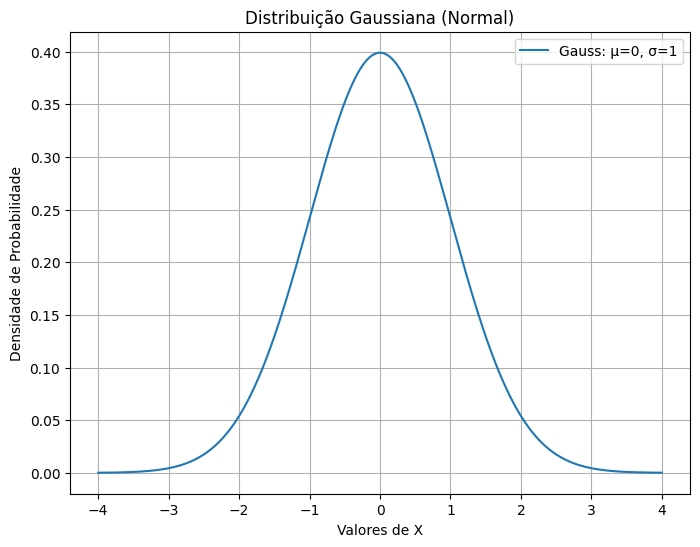

In [139]:
# Dados para o gráfico de Gauss
mu = 0  # média
sigma = 1  # desvio padrão
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Criando o gráfico
plt.figure(figsize=(8,6))
plt.plot(x, y, label=f'Gauss: μ={mu}, σ={sigma}')
plt.title("Distribuição Gaussiana (Normal)")
plt.xlabel("Valores de X")
plt.ylabel("Densidade de Probabilidade")
plt.grid(True)
plt.legend()

plt.show()

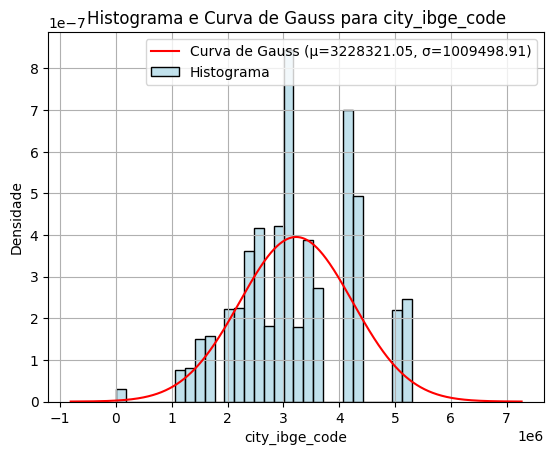

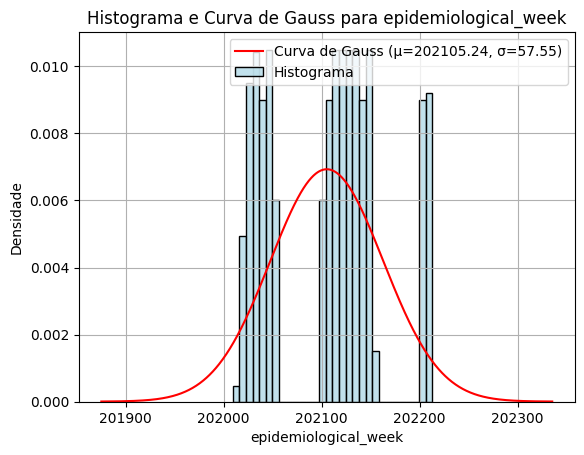

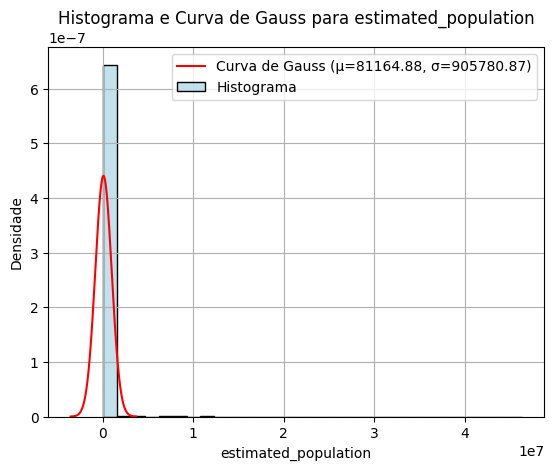

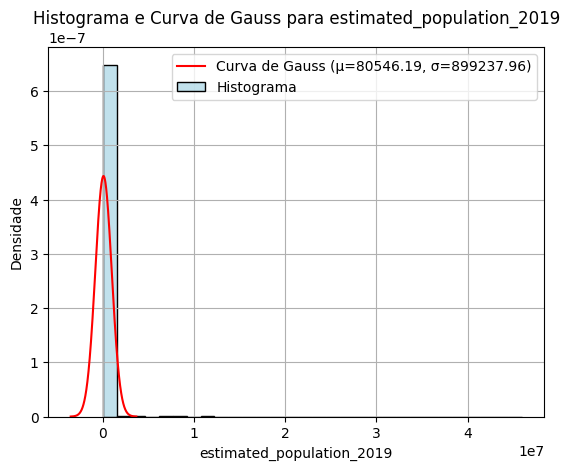

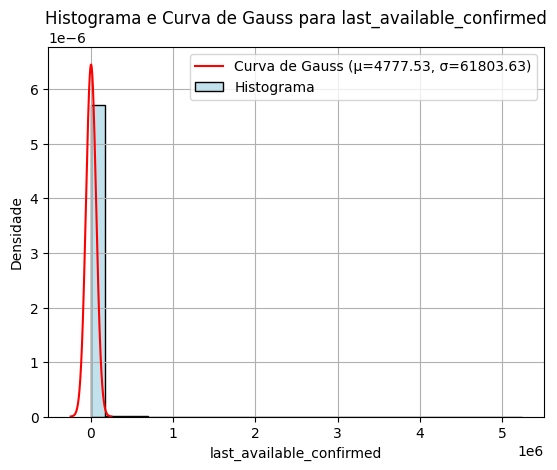

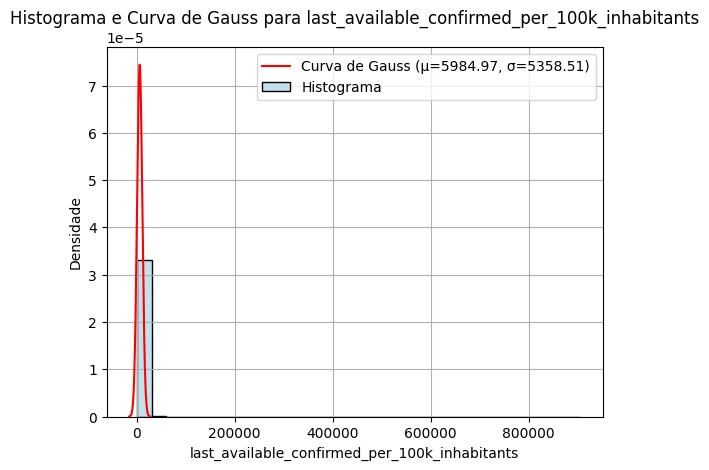

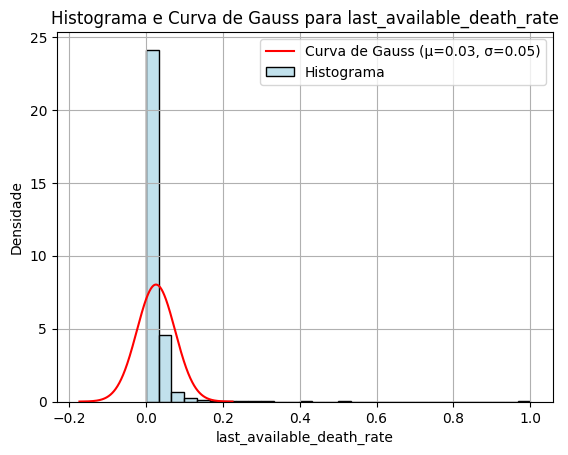

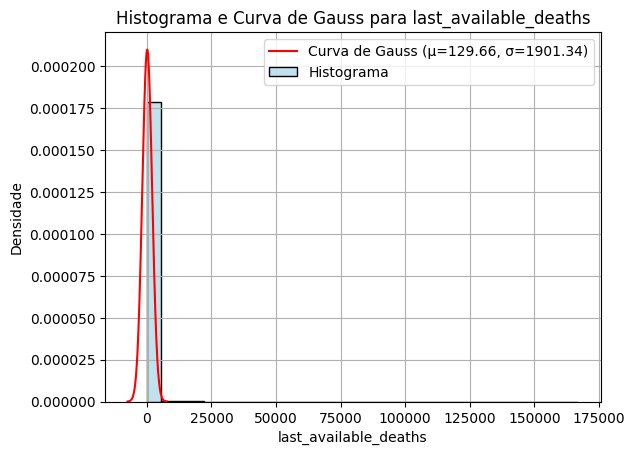

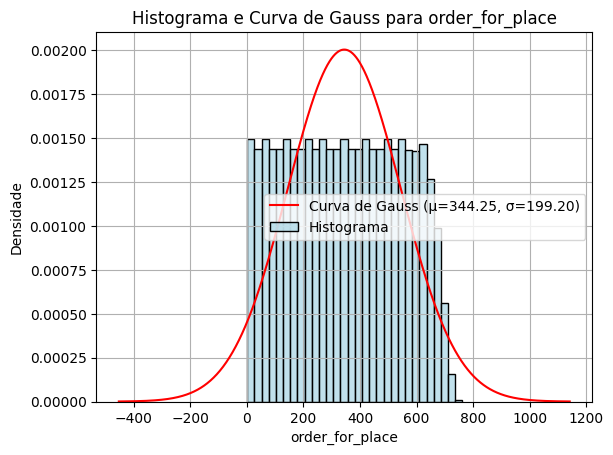

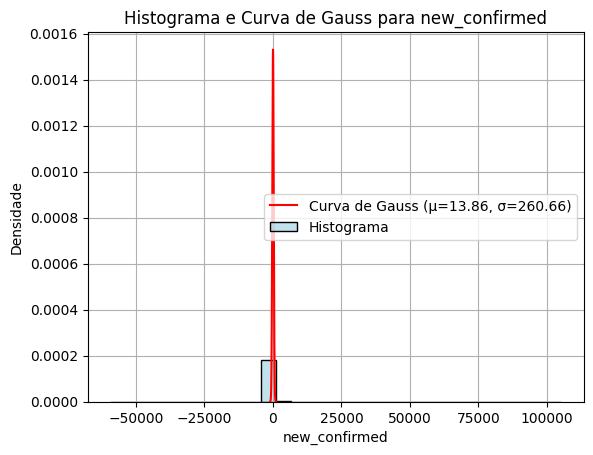

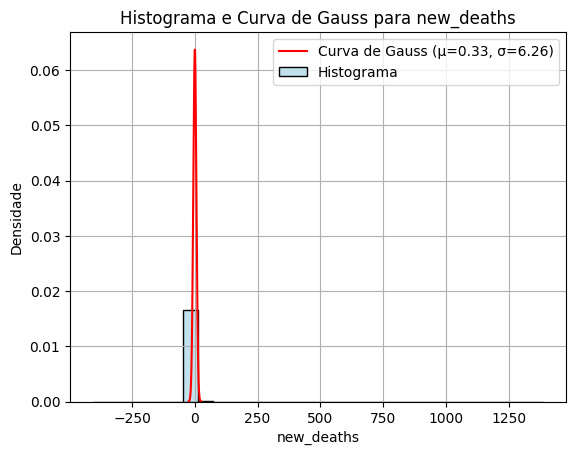

In [140]:
from scipy.stats import norm

# Para cada coluna do DataFrame, plotar o histograma e a curva de Gauss
for coluna in colunas_numericas.columns:
    # Criar o histograma
    sns.histplot(colunas_numericas[coluna], kde=False, stat='density', bins=30, color='lightblue', label='Histograma')

    # Calcular a média e o desvio padrão da coluna
    mu, sigma = colunas_numericas[coluna].mean(), colunas_numericas[coluna].std()

    # Gerar valores para a curva de Gauss
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    # Plotar a curva de Gauss
    plt.plot(x, y, color='red', label=f'Curva de Gauss (μ={mu:.2f}, σ={sigma:.2f})')

    # Configurações do gráfico
    plt.title(f'Histograma e Curva de Gauss para {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()

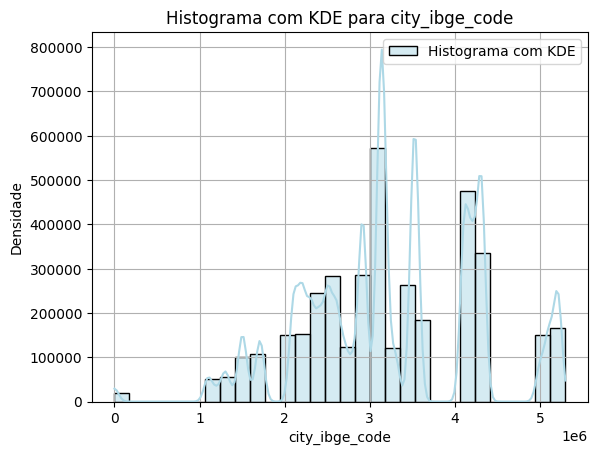

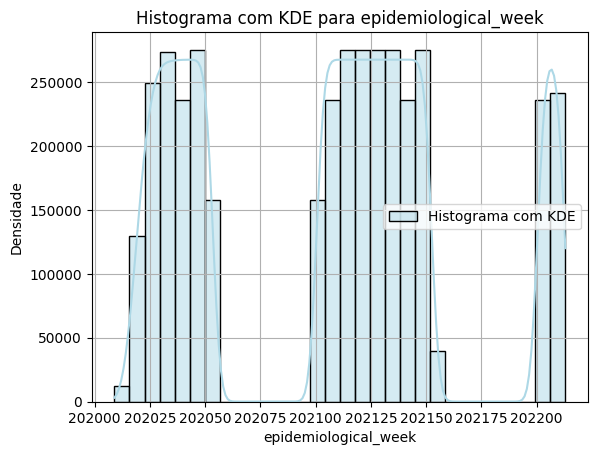

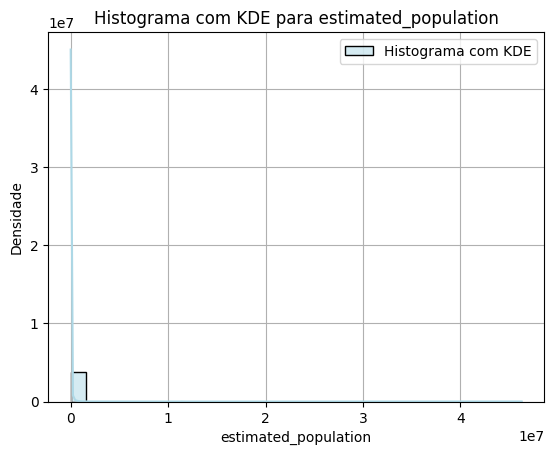

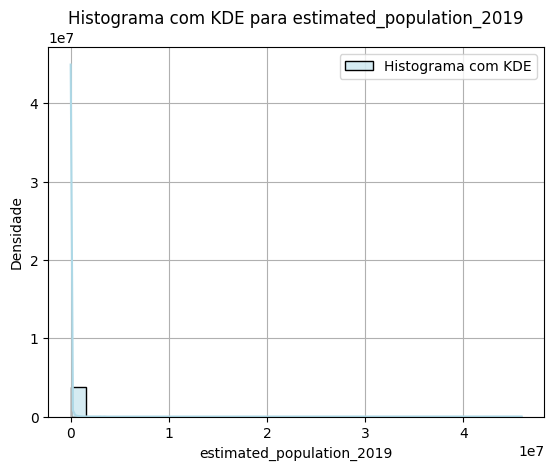

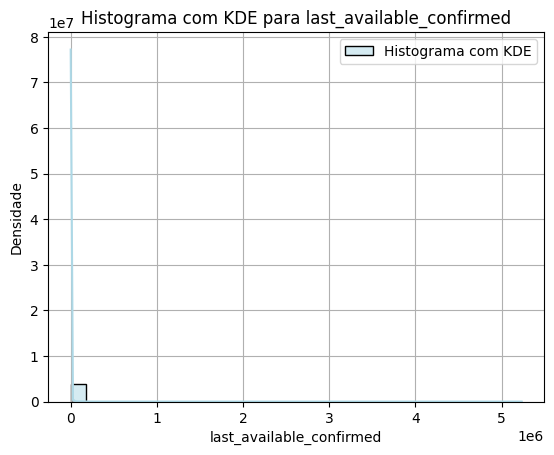

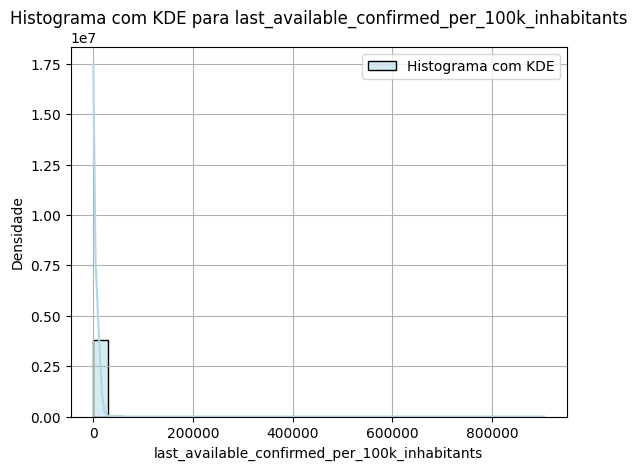

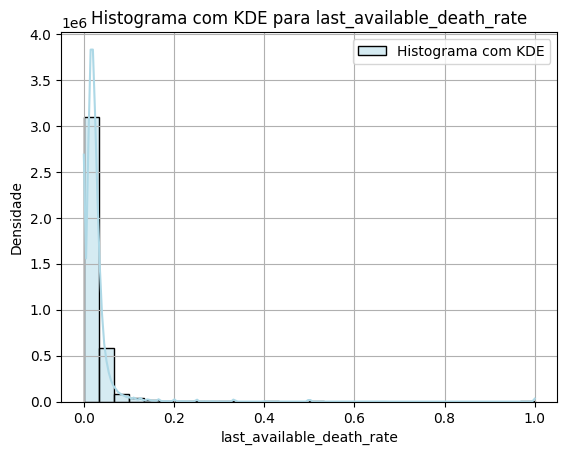

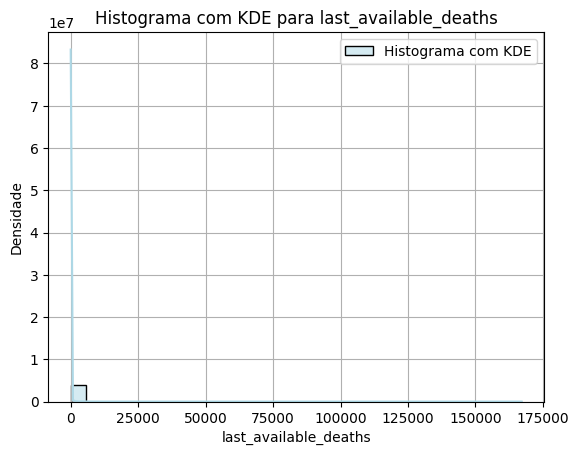

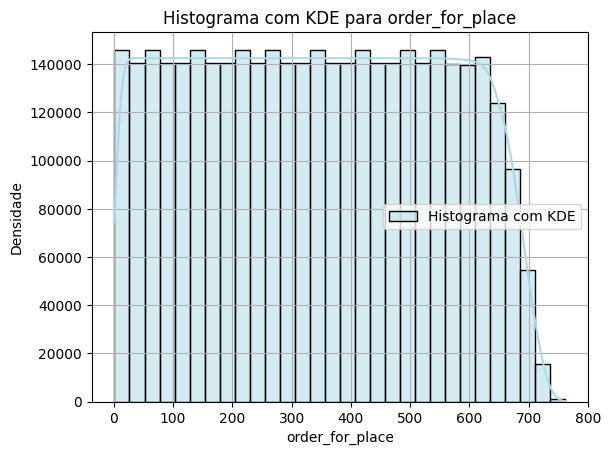

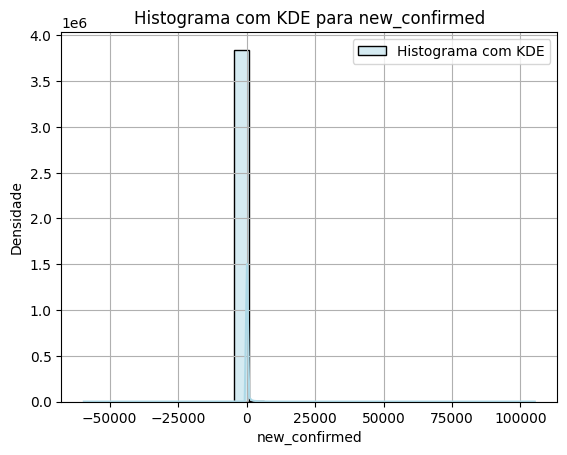

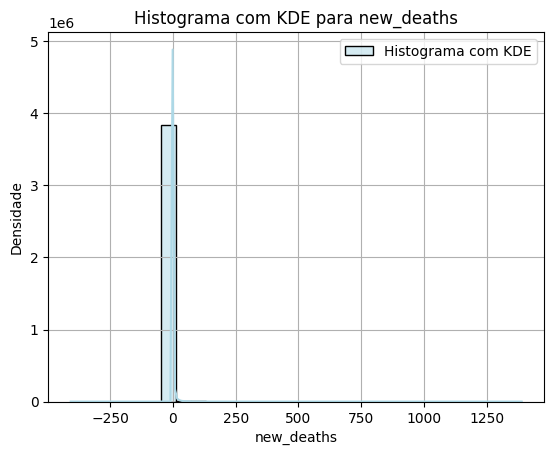

In [122]:
# Para cada coluna, plotar o histograma com a linha de distribuição (kde)
for coluna in colunas_numericas.columns:
    # Criar o histograma e a linha de distribuição (kde)
    sns.histplot(colunas_numericas[coluna], kde=True, bins=30, color='lightblue', label='Histograma com KDE')

    # Configurações do gráfico
    plt.title(f'Histograma com KDE para {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()

# **ESTATÍSTICA DESCRITIVA (Data de Entrega: 16/10/2024)**

Cada grupo deverá realizar uma análise detalhada do tipo de cada variável presente no conjunto de dados, apresentando os resultados graficamente. A análise deve incluir medidas de resumo que expliquem a concentração dos dados, destacar os valores mais frequentes, descrever a distribuição das variáveis e analisar as correlações entre elas. Além disso, uma investigação sobre dados anômalos (outliers) deve ser realizada, justificando a decisão de manter ou remover esses dados com base no contexto.

## Instruções para a Entrega:
- O trabalho deve ser enviado em um notebook Python, contendo tanto as imagens geradas quanto as análises escritas.
- **Storytelling** é fundamental para este trabalho. Utilize as perguntas a seguir como guia, mas não se limite a apenas respondê-las. Elas servem como sugestões para estruturar sua narrativa de análise de dados.

### Perguntas Sugeridas para Guiar o Trabalho:

1. **Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma?**
   - Identifique e descreva as variáveis categóricas e numéricas.

2. **Há valores ausentes no conjunto de dados? Explique-os.**
   - Verifique se há valores faltantes e discuta a natureza desses valores e suas possíveis implicações.

3. **Qual é a estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão?**
   - Apresente os principais resumos estatísticos que descrevem o comportamento das variáveis numéricas.

4. **Como as variáveis numéricas estão distribuídas?**
   - Visualize as distribuições das variáveis numéricas por meio de gráficos, como histogramas ou boxplots.

5. **Existe alguma correlação entre as variáveis numéricas?**
   - Utilize medidas de correlação para explorar as relações entre variáveis e apresente visualmente essas correlações (por exemplo, uma matriz de correlação).

6. **Como os dados categóricos estão distribuídos?**
   - Apresente a distribuição dos dados categóricos por meio de gráficos de barras ou outros métodos apropriados.

7. **Existe alguma relação entre as variáveis numéricas?**
   - Faça uma análise de correlação ou regressão entre variáveis numéricas para identificar possíveis relações.

### Análise de Outliers:
- Discuta os dados anômalos (outliers) encontrados durante a análise e justifique, em cada contexto, a melhor opção: **manter** ou **descartar** os outliers. Argumente como essas decisões impactam a análise e a interpretação dos dados.

---

# **SÉRIES TEMPORAIS (Data de Entrega: 21/10/2024)**

Séries temporais geralmente contêm informações valiosas para a análise e previsão. Cada grupo deve selecionar uma série temporal específica e, com base no conteúdo das aulas, realizar uma análise detalhada sobre o comportamento da série ao longo do tempo.

## Questões e Sugestões para Motivação da Análise:

1. **Mostre graficamente o comportamento da série temporal.**
   - Plote a série temporal e destaque os valores extremos (mínimo e máximo).
   - Verifique a existência de registros atípicos (outliers) e discuta-os.

2. **Quais são os componentes da série temporal?**
   - Identifique os componentes da série (tendência, sazonalidade, ciclo e ruído).
   - Faça uma análise separada de cada componente e apresente os gráficos correspondentes.

3. **Os resíduos da série seguem uma distribuição normal?**
   - Realize testes de normalidade nos resíduos e apresente os resultados.
   - Discuta o comportamento dos resíduos e como isso afeta a modelagem e a previsão.

---

**Observação Final:**
Esses tópicos e perguntas servem como guia para a análise, mas o grupo deve focar em contar uma história com os dados, adaptando as técnicas conforme os objetivos específicos do trabalho e o tema abordado na disciplina.
